In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
sys.path.append("../")
from diabnet.apply_ensemble import Predictor
from diabnet.data import get_feature_names
from diabnet.ensemble import Ensemble

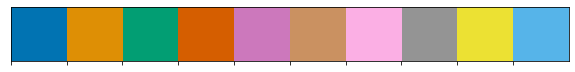

In [3]:
colors = sns.color_palette("colorblind")
sns.palplot(colors)
sns.set_style("whitegrid")
sns.set_style("ticks",{'axes.grid': True,'grid.color': '.95', 'grid.linestyle': '-'})

In [4]:
def plot():
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    color_boxplot = sns.color_palette("cool", n_colors=20)
#     plt.title(f"patient\n(id: {df['id'].iloc[id]}, age: {age}, diagnostic: {'positive' if label==1 else 'negative'})")
#     sns.boxplot(x=[i for i in probs_life[1]], y=probs_life[0], showfliers=False, palette=[color_boxplot[int(np.median(a)*20)] for a in probs_life[0]]);
    bp1 = plt.boxplot(probs_life[0], showfliers=False, patch_artist=True, labels=[i for i in probs_life[1]], medianprops=dict(linewidth=2.5, color='black'))
    colors = [color_boxplot[int(np.median(a)*20)] for a in probs_life[0]]
    for box, color in zip(bp1['boxes'], colors):
        box.set(facecolor = color)
        box.set(edgecolor = 'black')
    plt.xlabel("age")
    plt.ylim(0,1);
    plt.subplot(122)
    plt.title("negative control\n(non-diabetic older than 60 years)")
#     sns.boxplot(x=[i for i in neg_life[1]], y=neg_life[0], showfliers=False, palette=[color_boxplot[int(np.median(a)*20)] for a in neg_life[0]]);
    bp2 = plt.boxplot(neg_life[0], showfliers=False, patch_artist=True, labels=[i for i in neg_life[1]], medianprops=dict(linewidth=2.5, color='black'))
    colors = [color_boxplot[int(np.median(a)*20)] for a in neg_life[0]]
    for box, color in zip(bp2['boxes'], colors):
        box.set(facecolor = color)
        box.set(edgecolor = 'black')
    plt.xlabel("age")
    plt.ylim(0,1);

In [6]:
# ensemble = Ensemble('../diabnet/models/model-4-soft-label-age-positives-500-dropout0-bn-decay-flood-hyperopt-ax-batch256-adamw-lc2-20201001')
# c = get_feature_names("../datasets/visits_sp_unique_test_positivo_1000_random_0.csv", BMI=False, sex=True, parents_diagnostics=True)
# pred = Predictor(ensemble, c, "../datasets/visits_sp_unique_test_positivo_1000_random_0_negatives_older60.csv")

In [7]:
ensemble = Ensemble('../data/models/model-positive-13-adamw-lc5-2021-03-03')
c = get_feature_names("../data/datasets/visits_sp_unique_test_positivo_1000_random_0.csv", use_bmi=False, use_sex=True, use_parents_diagnosis=True)
pred = Predictor(ensemble, c, "../data/datasets/visits_sp_unique_test_positivo_1000_random_0_negatives_older60.csv")

../data/models/model-positive-13-adamw-lc5-2021-03-03
NEGATIVE FILE ../data/datasets/visits_sp_unique_test_positivo_1000_random_0_negatives_older60.csv


In [8]:
neg_life = pred.negatives_life(samples_per_model=1)

## Análise do baseline

O uso de Integrated Gradients depende da definição de um baseline. Esse baseline é um exemplo de entrada que define um caso para ser utilizado como um âncora (base) relativa.

Optamos aqui por utilizar como baseline um indivíduo hipotético que apresenta alelos dominantes (**0**) para todos os SNPs. A idade desse indivíduo é a mesma para os demais sendo analisado e o diagnóstico dos pais é **negativo**.

Abaixo analisaremos qual a predição para esse indivíduo.

In [9]:
baseline_snps = [0 for i in range(1000)]

In [10]:
baseline = np.array(baseline_snps +[50., 'X', 0, 0], dtype=object)

In [11]:
baseline[-10:]

array([0, 0, 0, 0, 0, 0, 50.0, 'X', 0, 0], dtype=object)

In [12]:
probs_life = pred.patient_life(baseline, samples_per_model=1)

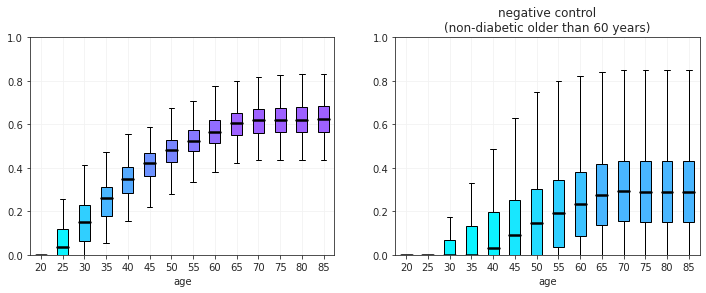

In [13]:
plot()

In [14]:
np.mean(probs_life[0][0])

0.0206388